In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from cv2 import MSER
import os
from matplotlib.colors import hsv_to_rgb

In [7]:
ROOT_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(ROOT_PATH, "data")

In [8]:
left_test_image = cv2.imread(os.path.join(DATA_PATH, "keparoi_left_frame.jpg"))
right_test_image = cv2.imread(os.path.join(DATA_PATH, "keparoi_right_frame.jpg"))

In [9]:
left_test_image.shape

(1080, 1920, 3)

In [10]:
left_test_image = cv2.cvtColor(left_test_image, cv2.COLOR_BGR2RGB) 

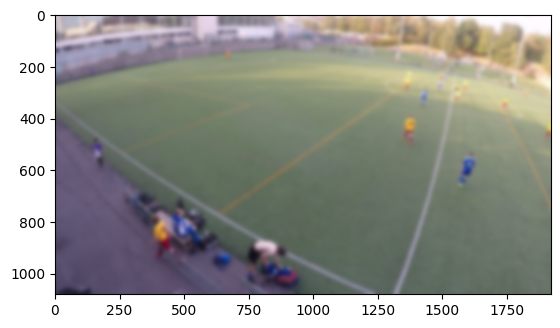

In [11]:
blurred_image = cv2.GaussianBlur(left_test_image, (51,51), 0)
plt.imshow(blurred_image)

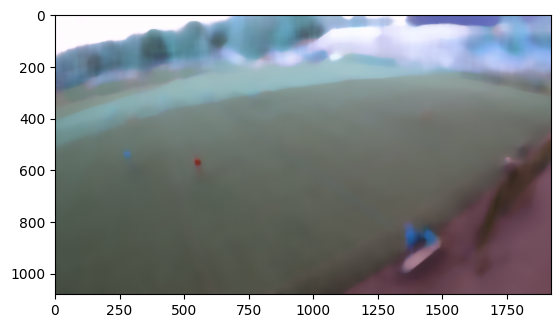

In [12]:
median_blurred_image = cv2.medianBlur(right_test_image, 51)
plt.imshow(median_blurred_image)

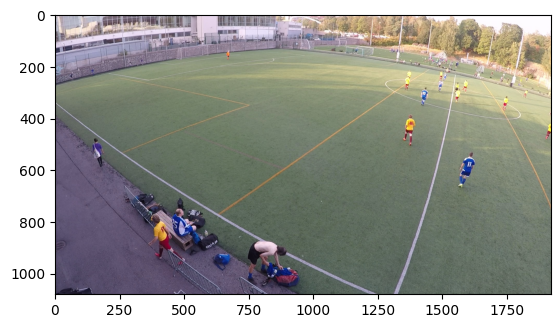

In [13]:
plt.imshow(left_test_image)

In [115]:
r_channel, g_channel, b_channel = cv2.split(median_blurred_image)

In [116]:
r_channel.shape

(1080, 1920)

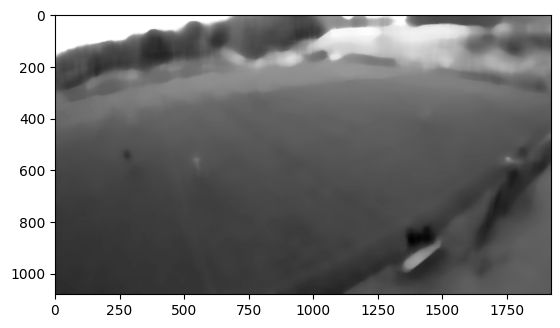

In [117]:
plt.imshow(r_channel, cmap="gray")

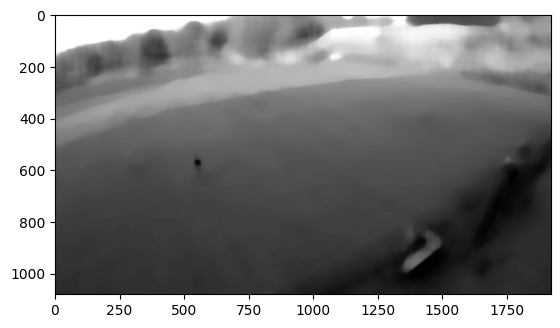

In [118]:
plt.imshow(g_channel, cmap="gray")

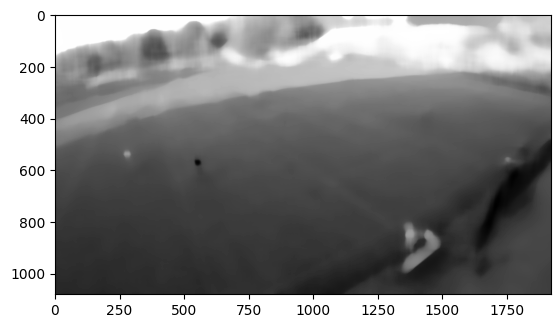

In [119]:
plt.imshow(b_channel, cmap="gray")

In [120]:
g_channel

array([[252, 252, 252, ..., 178, 179, 180],
       [252, 252, 252, ..., 176, 178, 178],
       [252, 252, 252, ..., 176, 176, 177],
       ...,
       [ 78,  78,  78, ...,  72,  72,  72],
       [ 79,  78,  78, ...,  72,  72,  72],
       [ 79,  79,  78, ...,  72,  72,  72]], dtype=uint8)

In [129]:
g_thresh = cv2.threshold(src=g_channel, thresh=75, maxval=255, type=cv2.THRESH_BINARY)[1]
b_thresh = cv2.threshold(src=b_channel, thresh=100, maxval=255, type=cv2.THRESH_BINARY)[1]
r_thresh = cv2.threshold(src=r_channel, thresh=100, maxval=255, type=cv2.THRESH_BINARY)[1]

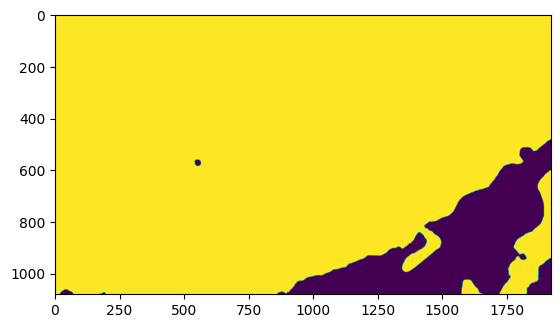

In [130]:
plt.imshow(g_thresh)

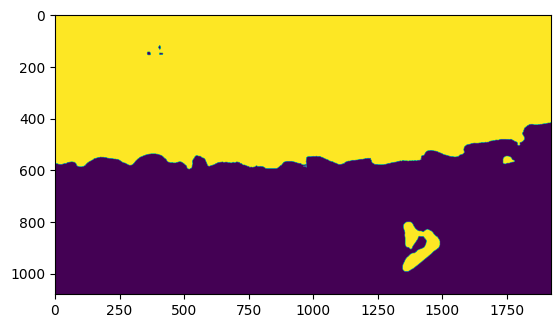

In [123]:
plt.imshow(b_thresh)

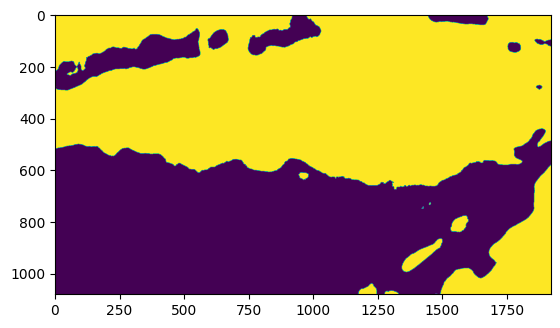

In [124]:
plt.imshow(r_thresh)

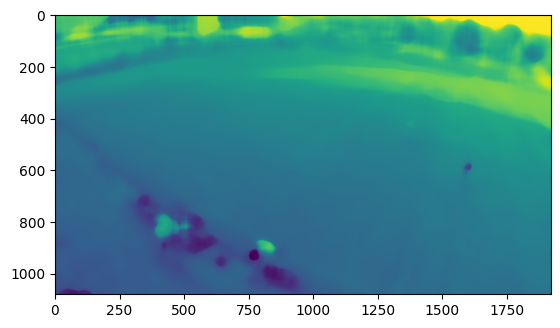

In [95]:
gray_image = cv2.cvtColor(median_blurred_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image)

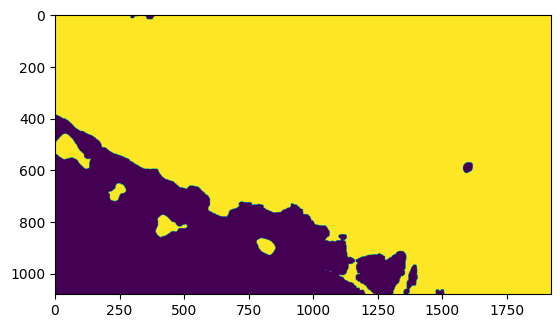

In [102]:
_ , mask = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
mask = cv2.erode(mask, np.ones((9, 9), np.uint8))
plt.imshow(mask)

In [97]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray_image)

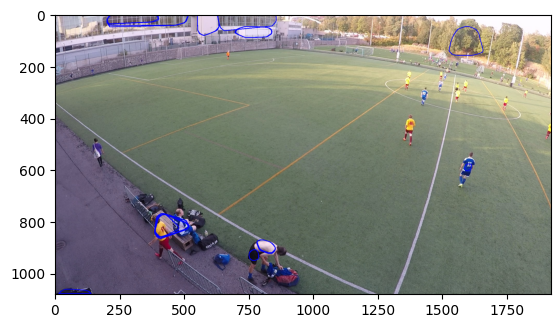

In [67]:
image_copy = left_test_image.copy()
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(image_copy, hulls, 1, (0, 0, 255), 2)
plt.imshow(image_copy)

In [21]:
light_green = (144,150,124)
dark_green = (45,60,53)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
light_g = (55, 26, 74)
dark_g = (148, 15, 34)
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)


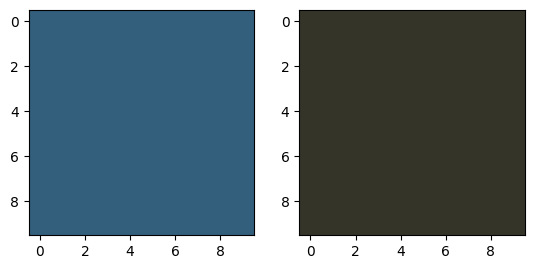

In [22]:
light_square = np.full((10, 10, 3), light_green, dtype=np.uint8) / 255.0
dark_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(light_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dark_square))
plt.show()

In [23]:
hsv_image = cv2.cvtColor(left_test_image, cv2.COLOR_RGB2HSV)

field_mask = cv2.inRange(hsv_image, light_green, dark_green)

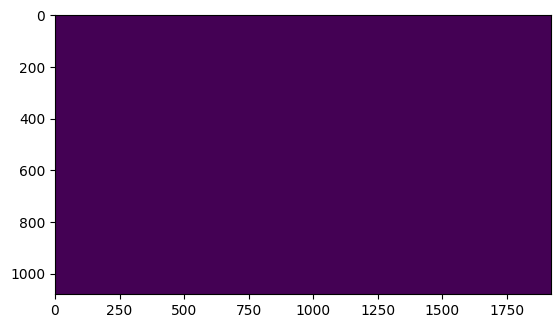

In [24]:
plt.imshow(field_mask)

In [189]:
def mask_field_from_image(frame):
    median_blurred_image = cv2.medianBlur(frame, 51)
    gray_image = cv2.cvtColor(median_blurred_image, cv2.COLOR_RGB2GRAY)
    _ , mask = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
    mask = ~mask
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (69,69))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE, kernel)
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    max_contour = max(contours, key = cv2.contourArea)
    approx = cv2.approxPolyDP(max_contour, 0.1 * cv2.arcLength(max_contour, True), True)
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    cv2.drawContours(mask, [approx], 0, (100, 100, 100), 5)
    final_mask = np.zeros(gray_image.shape, np.uint8)
    cv2.drawContours(final_mask, [approx], 0, (255),-1)
    final_mask = ~final_mask
    return final_mask

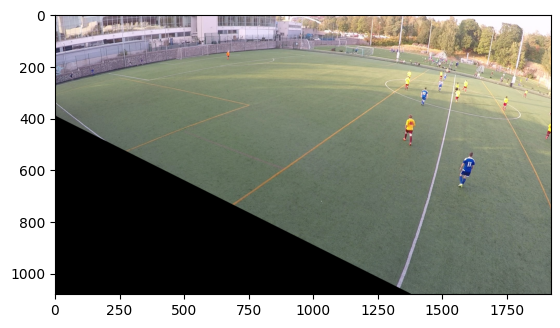

In [190]:
mask = mask_field_from_image(left_test_image)
new_image = cv2.bitwise_and(left_test_image, left_test_image, mask=mask)
plt.imshow(new_image)
plt.show()

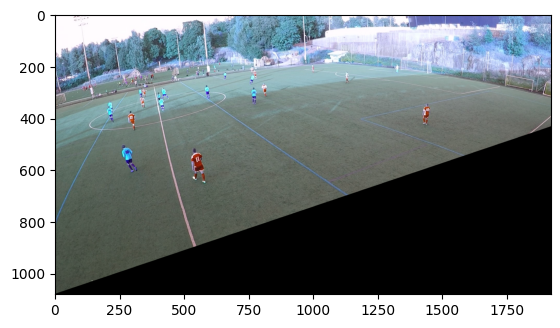

In [191]:
mask = mask_field_from_image(right_test_image)
new_image = cv2.bitwise_and(right_test_image, right_test_image, mask=mask)
plt.imshow(new_image)
plt.show()